# Merging datasets and adding Henry's Law Constants and Melting Points

In [1]:
# importing modules that will be used

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
# load aqsoldb csv file as a pandas dataframe
aqsoldb = pd.read_csv('aqsoldb.csv')

# load s and kh csv file as a pandas dataframe
s_and_kh = pd.read_csv('S_and_KH_data.csv')

In [3]:
# inspect dataframes
aqsoldb.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


In [4]:
# inspect dataframes
s_and_kh.head()

,InChI_Key,species,SLN,SMILES,LogS,LogKH,MW,MLOGP
0,AAEVYOVXGOFMJO-UHFFFAOYSA-N,Prometryn,S(CH3)C[6]=NC(=NC(=N@6)NHCH(CH3)CH3)NHCH(CH3)CH3,CSc1nc(NC(C)C)nc(NC(C)C)n1,-4.10,-6.709304,241.41,2.893
1,AEXMKKGTQYQZCS-UHFFFAOYSA-N,"3,3-Dimethylpentane",C(CH2CH3)(CH2CH3)(CH3)CH3,CCC(C)(C)CC,-4.23,12.129112,100.23,3.869
2,AFABGHUZZDYHJO-UHFFFAOYSA-N,2-Methylpentane,CH3CH(CH2CH2CH3)CH3,CCCC(C)C,-3.74,12.040558,86.20,3.516
3,AFBPFSWMIHJQDM-UHFFFAOYSA-N,N-Methylaniline,NH(CH3)C[7]=CHCH=CHCH=CH@7,CNc1ccccc1,-1.28,0.139262,107.17,1.859
4,AFFLGGQVNFXPEV-UHFFFAOYSA-N,1-Decene,CH2(CH2CH2CH2CH3)CH2CH2CH2CH=CH2,C=CCCCCCCCC,-5.51,12.507178,140.30,4.678


In [5]:
# how many common species are there?
aqsoldb['match'] = aqsoldb['SMILES'].isin(s_and_kh.SMILES)

aqsoldb[aqsoldb['match'] == True]

# there are 449 species that appear in both datasets - about half of the total s_and_kh number

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match
50,A-73,S-ethyl dipropylthiocarbamate,InChI=1S/C9H19NOS/c1-4-7-10(8-5-2)9(11)12-6-3/...,GUVLYNGULCJVDO-UHFFFAOYSA-N,CCCN(CCC)C(=O)SCC,-2.703174,0.018736,2,G3,189.324,...,72.0,0.0,0.0,0.0,0.0,20.31,79.703254,3.810795,121.696943,True
105,A-176,"1,2-dibutyl benzene-1,2-dicarboxylate",InChI=1S/C16H22O4/c1-3-5-11-19-15(17)13-9-7-8-...,DOIRQSBPFJWKBE-UHFFFAOYSA-N,CCCCOC(=O)c1ccccc1C(=O)OCCCC,-4.387683,0.057297,5,G5,278.348,...,110.0,1.0,0.0,0.0,1.0,52.60,119.630959,2.712391,398.857942,True
122,A-203,pyrene,InChI=1S/C16H10/c1-3-11-7-9-13-5-2-6-14-10-8-1...,BBEAQIROQSPTKN-UHFFFAOYSA-N,c1cc2ccc3cccc4ccc(c1)c2c34,-6.178797,0.058820,3,G5,202.256,...,74.0,4.0,0.0,0.0,4.0,0.00,93.455422,2.505956,666.619806,True
153,A-256,1-chlorohexane,"InChI=1S/C6H13Cl/c1-2-3-4-5-6-7/h2-6H2,1H3",MLRVZFYXUZQSRU-UHFFFAOYSA-N,CCCCCCCl,-3.122389,0.227966,2,G3,120.623,...,44.0,0.0,0.0,0.0,0.0,0.00,50.867228,2.447473,23.360990,True
156,A-262,octan-2-one,"InChI=1S/C8H16O/c1-3-4-5-6-7-8(2)9/h3-7H2,1-2H3",ZPVFWPFBNIEHGJ-UHFFFAOYSA-N,CCCCCCC(C)=O,-2.153696,0.051848,2,G3,128.215,...,54.0,0.0,0.0,0.0,0.0,17.07,57.455368,2.828868,76.636821,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,H-463,Tetrachloroethylene,InChI=1S/C2Cl4/c3-1(4)2(5)6,CYTYCFOTNPOANT-UHFFFAOYSA-N,ClC(Cl)=C(Cl)Cl,-2.740000,0.189838,4,G5,165.834,...,36.0,0.0,0.0,0.0,0.0,0.00,55.627655,3.675949,55.617271,True
9919,H-496,"1,1,1-Trichloroethane","InChI=1S/C2H3Cl3/c1-2(3,4)5/h1H3",UOCLXMDMGBRAIB-UHFFFAOYSA-N,CC(Cl)(Cl)Cl,-2.140000,0.256999,6,G5,133.405,...,32.0,0.0,0.0,0.0,0.0,0.00,46.013992,3.023716,20.364528,True
9921,H-514,Vernolate,InChI=1S/C10H21NOS/c1-4-7-11(8-5-2)10(12)13-9-...,OKUGPJPKMAEJOE-UHFFFAOYSA-N,CCCSC(=O)N(CCC)CCC,-3.300000,0.027000,2,G3,203.351,...,78.0,0.0,0.0,0.0,0.0,20.31,86.068196,3.799339,132.886435,True
9931,H-556,b-Endosulfan,InChI=1S/C9H6Cl6O3S/c10-5-6(11)8(13)4-2-18-19(...,RDYMFSUJUZBWLH-UHFFFAOYSA-N,O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,-6.080000,0.090204,4,G5,406.929,...,108.0,0.0,2.0,3.0,3.0,35.53,141.790641,2.187726,470.183414,True


### Merging Datasets

In [6]:
# adding LogKH where SMILES values match up
aqsoldb = aqsoldb.assign(LogKH=aqsoldb['SMILES'].map(s_and_kh.set_index('SMILES')['LogKH']))

In [7]:
# adding MLOGP where SMILES values match up
aqsoldb = aqsoldb.assign(MLOGP=aqsoldb['SMILES'].map(s_and_kh.set_index('SMILES')['MLOGP']))

In [8]:
aqsoldb.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,False,NaN,NaN
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,False,NaN,NaN
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,False,NaN,NaN
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,False,NaN,NaN
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,False,NaN,NaN


In [9]:
# how many have matched?
aqsoldb[aqsoldb['LogKH'].notnull()]

# 449 have a match

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP
50,A-73,S-ethyl dipropylthiocarbamate,InChI=1S/C9H19NOS/c1-4-7-10(8-5-2)9(11)12-6-3/...,GUVLYNGULCJVDO-UHFFFAOYSA-N,CCCN(CCC)C(=O)SCC,-2.703174,0.018736,2,G3,189.324,...,0.0,0.0,0.0,20.31,79.703254,3.810795,121.696943,True,0.579818,1.971
105,A-176,"1,2-dibutyl benzene-1,2-dicarboxylate",InChI=1S/C16H22O4/c1-3-5-11-19-15(17)13-9-7-8-...,DOIRQSBPFJWKBE-UHFFFAOYSA-N,CCCCOC(=O)c1ccccc1C(=O)OCCCC,-4.387683,0.057297,5,G5,278.348,...,0.0,0.0,1.0,52.60,119.630959,2.712391,398.857942,True,-2.230014,3.618
122,A-203,pyrene,InChI=1S/C16H10/c1-3-11-7-9-13-5-2-6-14-10-8-1...,BBEAQIROQSPTKN-UHFFFAOYSA-N,c1cc2ccc3cccc4ccc(c1)c2c34,-6.178797,0.058820,3,G5,202.256,...,0.0,0.0,4.0,0.00,93.455422,2.505956,666.619806,True,0.287682,4.760
153,A-256,1-chlorohexane,"InChI=1S/C6H13Cl/c1-2-3-4-5-6-7/h2-6H2,1H3",MLRVZFYXUZQSRU-UHFFFAOYSA-N,CCCCCCCl,-3.122389,0.227966,2,G3,120.623,...,0.0,0.0,0.0,0.00,50.867228,2.447473,23.360990,True,8.078938,2.957
156,A-262,octan-2-one,"InChI=1S/C8H16O/c1-3-4-5-6-7-8(2)9/h3-7H2,1-2H3",ZPVFWPFBNIEHGJ-UHFFFAOYSA-N,CCCCCCC(C)=O,-2.153696,0.051848,2,G3,128.215,...,0.0,0.0,0.0,17.07,57.455368,2.828868,76.636821,True,2.956512,2.129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9914,H-463,Tetrachloroethylene,InChI=1S/C2Cl4/c3-1(4)2(5)6,CYTYCFOTNPOANT-UHFFFAOYSA-N,ClC(Cl)=C(Cl)Cl,-2.740000,0.189838,4,G5,165.834,...,0.0,0.0,0.0,0.00,55.627655,3.675949,55.617271,True,7.385791,2.459
9919,H-496,"1,1,1-Trichloroethane","InChI=1S/C2H3Cl3/c1-2(3,4)5/h1H3",UOCLXMDMGBRAIB-UHFFFAOYSA-N,CC(Cl)(Cl)Cl,-2.140000,0.256999,6,G5,133.405,...,0.0,0.0,0.0,0.00,46.013992,3.023716,20.364528,True,7.418581,2.226
9921,H-514,Vernolate,InChI=1S/C10H21NOS/c1-4-7-11(8-5-2)10(12)13-9-...,OKUGPJPKMAEJOE-UHFFFAOYSA-N,CCCSC(=O)N(CCC)CCC,-3.300000,0.027000,2,G3,203.351,...,0.0,0.0,0.0,20.31,86.068196,3.799339,132.886435,True,1.139434,2.275
9931,H-556,b-Endosulfan,InChI=1S/C9H6Cl6O3S/c10-5-6(11)8(13)4-2-18-19(...,RDYMFSUJUZBWLH-UHFFFAOYSA-N,O=S1OCC2C(CO1)C1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl,-6.080000,0.090204,4,G5,406.929,...,2.0,3.0,3.0,35.53,141.790641,2.187726,470.183414,True,0.061875,3.115


In [10]:
# match names by capitalizing each species
aqsoldb['Name'] = aqsoldb.Name.str.capitalize()

In [11]:
# loading henry's law dataset into pandas dataframe
henry_db = pd.read_csv('cleaned_henry_dataset.csv')

In [12]:
henry_db

,Substance,Hcp
0,Oxygen,1.200000e-05
1,Ozone,1.000000e-04
2,Hydrogen atom,2.600000e-06
3,Hydrogen,7.800000e-06
4,Deuterium,7.900000e-06
...,...,...
4687,"(2,4-dichlorophenoxy)-acetic acid 2-ethylhexyl...",5.500000e-01
4688,"(2,4-dichlorophenoxy)-acetic acid,isooctyl ester",1.700000e-01
4689,(bromomethyl)-benzene,1.400000e-03
4690,(2-bromoethyl)-benzene,6.500000e-03


In [13]:
# adding Hcp where names values match up
aqsoldb = aqsoldb.assign(Hcp=aqsoldb['Name'].map(henry_db.set_index('Substance')['Hcp']))

In [14]:
aqsoldb

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP,Hcp
0,A-3,"N,n,n-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.000000,1,G1,392.510,...,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,False,NaN,NaN,NaN
1,A-4,Benzo[cd]indol-2(1h)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.000000,1,G1,169.183,...,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,False,NaN,NaN,NaN
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.000000,1,G1,140.569,...,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,False,NaN,NaN,NaN
3,A-8,"Zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.000000,1,G1,756.226,...,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,False,NaN,NaN,NaN
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.000000,1,G1,422.525,...,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,I-84,Tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,-3.010000,0.000000,1,G1,264.369,...,0.0,1.0,41.57,115.300645,2.394548e+00,374.236893,False,NaN,NaN,NaN
9978,I-85,Tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,-2.930000,0.000000,1,G1,444.440,...,3.0,4.0,181.62,182.429237,2.047922e+00,1148.584975,False,NaN,NaN,NaN
9979,I-86,Thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,-2.190000,0.019222,3,G5,150.221,...,0.0,1.0,20.23,67.685405,3.092720e+00,251.049732,False,NaN,NaN,NaN
9980,I-93,Verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,-3.980000,0.000000,1,G1,454.611,...,0.0,2.0,63.95,198.569223,2.023333e+00,938.203977,False,NaN,NaN,NaN


In [15]:
# how many have matched?
aqsoldb[aqsoldb['Hcp'].notnull()]

# 1045 have a match

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,match,LogKH,MLOGP,Hcp
18,A-26,1-chloro-3-(trifluoromethyl)benzene,"InChI=1S/C7H4ClF3/c8-6-3-1-2-5(4-6)7(9,10)11/h...",YTCGOUNVIAWCMG-UHFFFAOYSA-N,FC(F)(F)c1cccc(Cl)c1,-3.411514,0.000000,1,G1,180.556,...,0.0,1.0,0.00,66.596218,3.059902,254.107753,False,NaN,NaN,2.900000e-04
30,A-45,Hydroxylamine,"InChI=1S/H3NO/c1-2/h2H,1H2",AVXURJPOCDRRFD-UHFFFAOYSA-N,NO,-0.763034,0.861298,7,G4,33.030,...,0.0,0.0,46.25,12.462472,1.000000,2.000000,False,NaN,NaN,1.400000e+03
67,A-111,5-ethyl-2-methylpyridine,"InChI=1S/C8H11N/c1-3-8-5-4-7(2)9-6-8/h4-6H,3H2...",NTSLROIKFLNUIJ-UHFFFAOYSA-N,CCc1ccc(C)nc1,-1.004260,0.000000,1,G1,121.183,...,0.0,1.0,12.89,55.745877,2.881556,176.264053,False,NaN,NaN,5.200000e-01
69,A-114,Prednisolone,InChI=1S/C21H28O5/c1-19-7-5-13(23)9-12(19)3-4-...,OIGNJSKKLXVSLS-VWUMJDOOSA-N,C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@...,-3.178447,0.015047,2,G3,360.450,...,4.0,4.0,94.83,153.341308,1.747281,723.913082,False,NaN,NaN,3.700000e+02
74,A-119,Fluoromethane,InChI=1S/CH3F/c1-2/h1H3,NBVXSUQYWXRMNV-UHFFFAOYSA-N,CF,-0.175874,0.000000,1,G1,34.033,...,0.0,0.0,0.00,12.904786,1.000000,2.000000,False,NaN,NaN,6.100000e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,H-570,Pebulate,InChI=1S/C10H21NOS/c1-4-7-8-11(6-3)10(12)13-9-...,SGEJQUSYQTVSIU-UHFFFAOYSA-N,CCCCN(CC)C(=O)SCCC,-3.410000,0.083556,4,G5,203.351,...,0.0,0.0,20.31,86.068196,3.705530,138.886435,True,3.194183,2.275,4.100000e-02
9965,I-63,Papaverine,InChI=1S/C20H21NO4/c1-22-17-6-5-13(10-18(17)23...,XQYZDYMELSJDRZ-UHFFFAOYSA-N,c1(nccc2cc(c(OC)cc12)OC)Cc1cc(c(cc1)OC)OC,-3.870000,0.790000,2,G2,339.391,...,0.0,3.0,49.81,146.668701,2.039871,892.243703,False,NaN,NaN,1.300000e+07
9967,I-66,Phenobarbital,InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...,DDBREPKUVSBGFI-UHFFFAOYSA-N,C1(NC(C(c2ccccc2)(C(=O)N1)CC)=O)=O,-2.290000,0.095670,5,G5,232.239,...,1.0,2.0,75.27,98.199515,2.535973,461.783925,False,NaN,NaN,5.800000e+08
9974,I-79,Sulfamethazine,InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...,ASWVTGNCAZCNNR-UHFFFAOYSA-N,S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1,-2.730000,0.230750,2,G3,278.337,...,0.0,2.0,97.97,111.308206,2.330509,675.919365,False,NaN,NaN,3.200000e+07


### Getting the dataset ready for machine learning

In [16]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [17]:
# adding a Mol column into the dataframe which can be utilised by rdkit
PandasTools.AddMoleculeColumnToFrame(aqsoldb, 'SMILES', 'Mol')

In [18]:
# calculate number of aromatic atoms
aqsoldb['NumAromaticAtoms'] = [sum(row.GetAtomWithIdx(i).GetIsAromatic() for i in range(row.GetNumAtoms())) for row in aqsoldb['Mol']]

In [19]:
aqsoldb['NumAromaticAtoms']

0        0
1       10
2        6
3       36
4       12
        ..
9977     6
9978     6
9979     6
9980    12
9981    16
Name: NumAromaticAtoms, Length: 9982, dtype: int64

In [20]:
# calculating aromatic proportion (AP) descriptor
def AP(df):
    return df['NumAromaticAtoms'] / df['HeavyAtomCount']

aqsoldb['AP'] = aqsoldb.apply(AP, axis=1)

In [21]:
aqsoldb.dtypes

ID                      object
Name                    object
InChI                   object
InChIKey                object
SMILES                  object
Solubility             float64
SD                     float64
Ocurrences               int64
Group                   object
MolWt                  float64
MolLogP                float64
MolMR                  float64
HeavyAtomCount         float64
NumHAcceptors          float64
NumHDonors             float64
NumHeteroatoms         float64
NumRotatableBonds      float64
NumValenceElectrons    float64
NumAromaticRings       float64
NumSaturatedRings      float64
NumAliphaticRings      float64
RingCount              float64
TPSA                   float64
LabuteASA              float64
BalabanJ               float64
BertzCT                float64
match                     bool
LogKH                  float64
MLOGP                  float64
Hcp                    float64
Mol                     object
NumAromaticAtoms         int64
AP      

In [22]:
aqsoldb.to_csv('curated_aqsoldb.csv', index=False)

#### EDA

Text(0.5, 1.0, 'The effect of aromatic proportion on solubility')

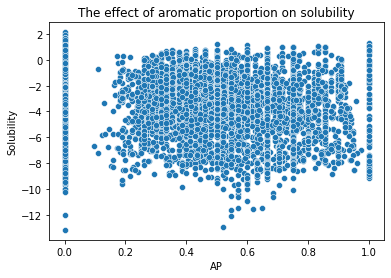

In [24]:
# Solubility vs AP
sns.scatterplot(data=aqsoldb, x='AP', y='Solubility').set_title('The effect of aromatic proportion on solubility')

There really isn't any correlation here.

Text(0.5, 1.0, 'The effect of number of rotatable bonds on solubility')

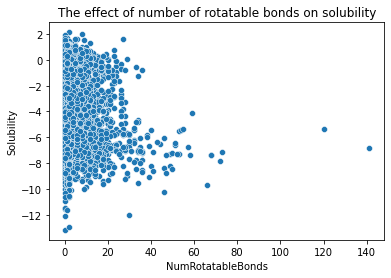

In [26]:
# Solubility vs NumRotatableBonds
sns.scatterplot(data=aqsoldb, x='NumRotatableBonds', y='Solubility').set_title('The effect of number of rotatable bonds on solubility')

No real correlation here either.

Text(0.5, 1.0, 'The effect of number of MLogP on solubility')

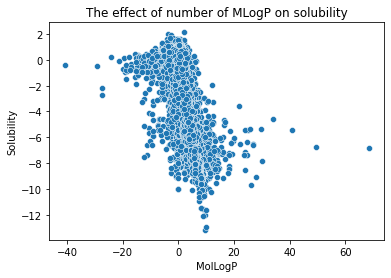

In [27]:
# Solubility vs MLogP
sns.scatterplot(data=aqsoldb, x='MolLogP', y='Solubility').set_title('The effect of number of MLogP on solubility')

somewhat negative correlation